<a href="https://colab.research.google.com/github/zaidhamad139/Prediction-of-Product-Sales/blob/main/london_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
fpath='/content/drive/MyDrive/Colab Notebooks/AXSOSACADEMY/06-AdvancedML/Week24/Data/london_weather_MODIFIED - london_weather_MODIFIED.csv'
df=pd.read_csv(fpath)
pd.set_option('display.max_columns',100)

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df = df.set_index('date')

In [14]:
df = df[df.index.year >= 2000]

In [15]:
features = ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']
df = df[features]

In [16]:
df['precipitation'] = df['precipitation'].fillna(0)

In [17]:

df['mean_temp'] = df['mean_temp'].fillna(df['mean_temp'].mean())
df['min_temp'] = df['min_temp'].fillna(df['min_temp'].mean())
df['max_temp'] = df['max_temp'].fillna(df['max_temp'].mean())

In [18]:
df['snow_depth'] = df['snow_depth'].fillna(0)

In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7671 non-null   float64
 1   mean_temp      7671 non-null   float64
 2   min_temp       7671 non-null   float64
 3   max_temp       7671 non-null   float64
 4   snow_depth     7671 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [20]:
df_q1 = df.copy()

In [21]:
df_q1_filtered = df_q1.loc['2000':'2010']

In [22]:
monthly_precipitation = df_q1_filtered['precipitation'].resample('M').sum()

/tmp/ipython-input-2840895598.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_precipitation = df_q1_filtered['precipitation'].resample('M').sum()


In [23]:
max_precipitation_date = monthly_precipitation.idxmax()
max_precipitation_value = monthly_precipitation.max()


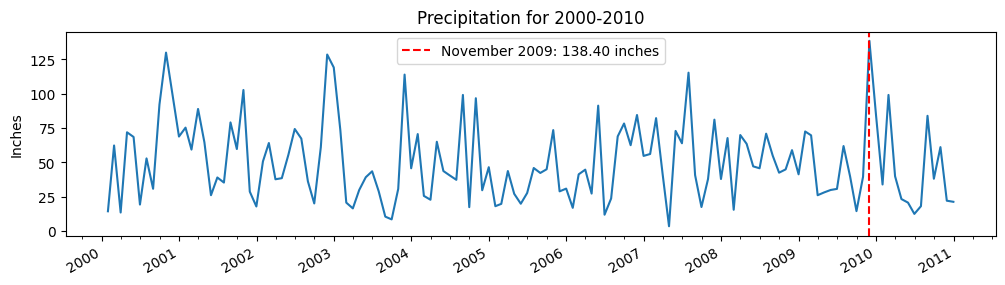

In [24]:
import matplotlib.dates as mdates

# Plot the monthly precipitation data for 2000-2010
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(monthly_precipitation.index, monthly_precipitation.values)

# Add a vertical line at the date of max precipitation
ax.axvline(max_precipitation_date, color='red', linestyle='--', label=f"{max_precipitation_date.strftime('%B %Y')}: {max_precipitation_value:.2f} inches")

# Set title and labels
ax.set_title("Precipitation for 2000-2010")
ax.set_ylabel("Inches")

# Customize major x-axis ticks
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=90)

# Customize minor x-axis ticks
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('')) # Do not label minor ticks

# Improve date formatting
fig.autofmt_xdate()

# Add legend
ax.legend()

plt.show()

In [25]:
df_q2 = df.copy()

In [26]:
yearly_mean_temp = df_q2['mean_temp'].resample('Y').mean()


/tmp/ipython-input-4717027.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mean_temp = df_q2['mean_temp'].resample('Y').mean()


In [27]:
min_mean_temp_date = yearly_mean_temp.idxmin()
min_mean_temp_value = yearly_mean_temp.min()

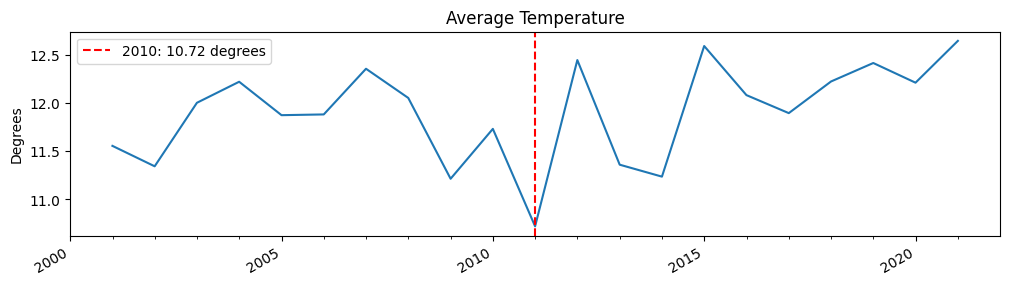

In [9]:
import matplotlib.dates as mdates

# Plot the yearly average temperature data for 2000-2020
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(yearly_mean_temp.index, yearly_mean_temp.values)

# Add a vertical line at the date of min mean temp
ax.axvline(min_mean_temp_date, color='red', linestyle='--', label=f"{min_mean_temp_date.strftime('%Y')}: {min_mean_temp_value:.2f} degrees")

# Set title and labels
ax.set_title("Average Temperature")
ax.set_ylabel("Degrees")

# Customize major x-axis ticks
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=90)

# Customize minor x-axis ticks
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('')) # Do not label minor ticks

# Improve date formatting
fig.autofmt_xdate()

# Add legend
ax.legend()

plt.show()